# Introduction (Assignment 2 - SIADS 521: Exploration of Data)

## Assignment Details

__Overview:__ The purpose of this assignment is two-fold: (a) to have you engaged in independent learning with respect to a novel visual exploration method, a novel python-based information visualization toolkit, or both, and (b) to enhance our knowledge overall in the class (including mine!) by engaging in peer instruction. 

More specifically, I want you to __write a tutorial demonstration__ to help us fill in a cell in [this spreadsheet](https://docs.google.com/spreadsheets/d/1QJM6K-rJZzLNfqU_vL6uTOE7Mp9OFG5Esji9dF5LNWQ/edit#gid=0). You may not demonstrate a visualization that was covered in class using the same library used in class, though you may demonstrate a visualization that was covered in class using a different library if you like.

***
__<font color=blue>REVIEW CRITERIA</font>__  <br>
Your assignment will be graded on the following areas:

Visualization Technique (20%) <br>
 - A narrative description of the visualization you are planning to use, describing how it works (10%)
 - A discussion regarding the circumstances this visualization should and should not be used (what is it close to? What else could you consider? How does it relate to specific aspects of data? (10%)

Visualization Library (20%) <br>
 - The library you are going to use, and a background on why the library is good for this visualization. Who created it? Is it open source? How do you install it? (10%)
 - A discussion of the general approach and limitations of this library. Is it declarative or procedural? Does it integrate with Jupyter? Why you decided to use this library (especially if there are other options)? (10%)

Demonstration (60%) <br>
 - The dataset you picked and instructions for cleaning the dataset. You should pick a suitable dataset to demonstrate the technique, toolkit, and problem you are facing. (10%)
 - The quality of your demonstration. First demonstrate the basics of this approach, then show a few of the edges of how the library might be used for other cases. This is the "meat" of the assignment. (40%)
 - Adherence to some of Rule et al's rules for computational analyses. You must explicitly describe the rules (aim for 4) you have adhered to in this assignment and provide 2-3 sentences about how you have adhered to these rules. (10%)

***

__Goal:__ The purpose of using a data visualization is to tell a story and the purpose of writing up a demonstration is to teach someone else about what you have learned so that they can use it, too. Think of this as a worked example, something like a medium blog post that you have written up and are posting so that other data scientists can learn about the potential uses of this style of data exploration and visualization. You should be concise in your wording and clear in your demonstration. Refer to the Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks reading for how to document and format your demonstration in a way that is reproducible.
You will need to include the write up and demonstrate in a new notebook which you will be submitting to the staff. __Your notebook should be primarily narrative in nature, broken up by code cells that demonstrate the work that you're demonstrating.__




## Acknowledgements

 - Inspiration for the formatting of this notebook found on github from Will Koehrsen
 - Stylistically, I got inpiration and code formatting from:
    - https://github.com/jupyter-guide/ten-rules-jupyter
    - https://datavizcatalogue.com/
    - @Chrisbrooks regarding the use of widgets
    - Stacks Overflow and seaborn documentation
***
 - Information about Seaborn
    - https://seaborn.pydata.org/installing.html
***
 - __Source of my chosen dataset__
     - MIT Election Data and Science Lab, 2017, "U.S. President 1976–2016", https://doi.org/10.7910/DVN/42MVDX, Harvard Dataverse, V5, UNF:6:Mw0hOUHAijKPTVRAe5jJvg== [fileUNF]


## Imports & Notebook Setup

In [1]:
#for data manipulation
import numpy as np
import pandas as pd

#for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for interactivity
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

#go wide screen!
from IPython.core.display import display, HTML; display(HTML("<style>.container { width:99% !important; }</style>"))

## My Dataset

I am a high school physics teacher, so I am of course very curious about educational data and trends, but I have always been very curious about political data and I have grown increasingly interested in using data to explore concerns related to things like gerrymandering (racial and otherwise) as well as other political trends.

I decided I wanted to explore trends in data related to prior presidential elections to get started.  Specifically, I wanted to see if I could design a visualization that could show voting trends by state over time.  I wanted to see if I could demonstrate which state are more "red" (Republican) and which are more "blue" (Democrat) among other things.  I figured I would see what else I could find out once I started to visualize!

__The data set I chose I found on https://electionlab.mit.edu/data and involved presidential election data from 1976 to 2016 (the most recent).__  "This data file contains constituency (state-level) returns for elections to the U.S. presidency from 1976 to 2016."

In [2]:
df=pd.read_csv("1976-2016-president.csv")

df.head(20)

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN
5,1976,Alabama,AL,1,63,41,US President,"Macbride, Roger",libertarian,False,1481,1182850,20171015,NaN
6,1976,Alabama,AL,1,63,41,US President,NaN,NaN,True,308,1182850,20171015,NaN
7,1976,Alaska,AK,2,94,81,US President,"Ford, Gerald",republican,False,71555,123574,20171015,NaN
8,1976,Alaska,AK,2,94,81,US President,"Carter, Jimmy",democrat,False,44058,123574,20171015,NaN
9,1976,Alaska,AK,2,94,81,US President,"Macbride, Roger",libertarian,False,6785,123574,20171015,NaN


__NOTES:__
 - As you can see, it includes data about each state for each presidential election from 1976 - 2016, includes the party candidate for _all_ parties that were on a state's ballet (and even notes the number of 'write-in' ballots per state).
 
 <br>
 - 'candidatevotes' = the number of voters in a state who voted for the given party candidate
 - 'totalvotes' = all of the votes counted in the state a given year

# Analysis and Modeling

## Visualization Technique Chosen

__<font color=blue>Description & Limitations of the Visualization</font>__  <br>

__I decided I wanted to use a heatmap for the following reasons:__
 - I wanted to notice patterns over time, and across multiple states.  Heatmaps make it easy to quickly see comparisons like this in a way that is difficult to do in other kinds of static graphs.
 - I wanted an easy way to visualize the data and thought that representing the data through coloring/shading would be a quick way to demonstrate trends.
 - It is convenient for representing categorical data
 - It would be informative as a "first analysis" tool to identify where I could dig deeper into data using other visualizations.

Heat maps can easily demonstrate patterns between categorical or numerica data through a color-coded grid.  You can identify two variables to plot on the two axes and a third variable that would be what is actually graphed visually using a color scale.  The gradient of the colors represents a numerical or categorical scaling for with a color-scale bar adjacent to the graph can give contect (the "cbar").  A significant limitation of heatmap is that while it can nicely visualize differences in data, unless you "annotate" the heatmap (annotate=True) it is very difficult to see exactly where numerical data actually lies in the color spectrum.  Usually normalization of data is also a good idea otherwise the color spectrum can lead to some very "dark" values which 'skew' the colors of the rest of the graph.

__Other visualization I strongly considered:__
 - bubble plots where the the size of the bubble would represent the "number of votes for a winning candidate in a state" (for example) and then I would have a bubble for each state and if the state went to a Democrat, I would color the bubble <font color=blue>blue</font> and if it went Republican, I would color it <font color=red>red</font>.  The issue was that since I wanted to see how data evolved over time, I would likely need to put a "play" button beneath the graph that would scroll through time from 1976 to 2016.  It would have been pretty fun to look at, I think, but also wouldn't make it easy to make a quick comparison over time.
 - I also thought about using a Cloropleth map as a heat map where I would map the colorcoding onto a map of the United States which would have also looked great, but would have either needed a "drop down" widget to select the election year, multiple Chloropleths right next to each other, or a play button that scrolled through time beneath the map, again, to see how the data evolved over time.

## Visualization Library Chosen

__<font color=blue>Information & Limitations of the Visualization Library</font>__  <br>

I chose the Seaborn Library which I believe was created by [Matt Waskom](https://github.com/mwaskom) as he is credited on the [Seaborn website](https://seaborn.pydata.org/).  It is open source and was created in 2014.  In doing research online, I had seen some nice heatmap visualizations using seaborn and the code seemed fairly robust so that there were a number of detailing options that would make visualizations easier to read.  There seemed to be limited other options for heatmaps using Python.  _Plot.ly_ was also an option but, as I mentioned, I had seen some nice visualizations online using Heatmaps and Seaborn so I wanted to try it out.  I also wanted to potentially explore the data with a violin plot which was also easy to render with Seaborn (and I had heard good things from my peers on SLACK about Seaborn as well).  Seaborn also works directly with Matplotlib which we had been learning about in the course and since I had not made visualizations in python before it seemed like a good place to start!  I would say that Seaborn involves procedural programming in that you have to specify exact steps to get the desired result.  It integrates directly into Jupyter basically as a package of Matplotlib.

Some limitations that would have me explore _Plot.ly_ more next time include that I tried to include more interactivity with the heatmap, including mouse "hover over" features that were difficult to code (and were messy enough I did not end up including them).  I wanted the viewer to be able to hover his/her mouse over the grid and find out the #of votes that went to the winning candidate, the name of the candidate, and potentially even the number of electoral college votes, for example.  It seems like this interactivity is more organic in _Plot.ly Go_ and _Express_ , but not so much in seaborn.

***

I installed the Seaborn library using Conda: <br>
  -  __CODE:__ _<font color=red>conda install seaborn</font>_ _(more information found [here](https://seaborn.pydata.org/installing.html))_
 
Dependencies: <br>
- Python 2.7 or 3.5+


Mandatory dependencies: <br>
- numpy (>= 1.9.3)
- scipy (>= 0.14.0)
- matplotlib (>= 1.4.3)
- pandas (>= 0.15.2)

## Data Cleaning & Manipulation

In [3]:
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
0,1976,Alabama,AL,1,63,41,US President,"Carter, Jimmy",democrat,False,659170,1182850,20171015,NaN
1,1976,Alabama,AL,1,63,41,US President,"Ford, Gerald",republican,False,504070,1182850,20171015,NaN
2,1976,Alabama,AL,1,63,41,US President,"Maddox, Lester",american independent party,False,9198,1182850,20171015,NaN
3,1976,Alabama,AL,1,63,41,US President,"Bubar, Benjamin """"Ben""""",prohibition,False,6669,1182850,20171015,NaN
4,1976,Alabama,AL,1,63,41,US President,"Hall, Gus",communist party use,False,1954,1182850,20171015,NaN


The Dataframe had a number of unnecessary columns for the purpose of my exploration and had rows for each state each year, and rows for each party candidate who received votes (and also "write-ins"!).  I decided to focus on just the top two political parties for the purpose of this analysis.

In [4]:
#removing unwanted columns
df.drop(['state_fips','state_cen','state_ic','writein','version','notes', 'office'], axis=1, inplace=True)

In [5]:
#only keep the top two political parties for visualization purposes
df = (df.loc[df['party']
        .isin(['democrat','republican'])]
        .reset_index()
        .drop('index', axis=1)
        .fillna(0)
     )

df.head()

,year,state,state_po,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,AL,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,AL,"Ford, Gerald",republican,504070,1182850
2,1976,Alaska,AK,"Ford, Gerald",republican,71555,123574
3,1976,Alaska,AK,"Carter, Jimmy",democrat,44058,123574
4,1976,Arizona,AZ,"Ford, Gerald",republican,418642,742719


I decided I wanted to just keep the data per state of the party that won the state for each year.  To do this, I "kept the first" value for each state after examining how the data was organized.

In [6]:
#keeping the data per state of the party that won the state that year
df = df.groupby('year').apply(lambda x: x.drop_duplicates(subset='state', keep="first"))
df.head()

year       state state_po      candidate       party  candidatevotes  \
year                                                                           
1976 0  1976     Alabama       AL  Carter, Jimmy    democrat          659170   
     2  1976      Alaska       AK   Ford, Gerald  republican           71555   
     4  1976     Arizona       AZ   Ford, Gerald  republican          418642   
     6  1976    Arkansas       AR  Carter, Jimmy    democrat          498604   
     8  1976  California       CA   Ford, Gerald  republican         3882244   

        totalvotes  
year                
1976 0     1182850  
     2      123574  
     4      742719  
     6      767535  
     8     7803770

## Data Visualizations and Analysis

I want to create a color spectrum from the "most democratic" (blue) to "most republican" (red) states visually.  __I decided to make the candidate votes
values negative when the state went republican so I could have a kind of continuous spectrum representing the states with the highest number of democratic votes to the highest number of republican votes by state state.__  This was a convenient way to handle the fact that my "scale" wouldn't go from 0 to a high number but rather from a high number of Republican votes to a high number of Democratic votes.  Making the votes from the states that went to a Republican made the spectrum continuous from high negative (more Republican) to high positive (more Democrat).

In [7]:
#making the 'candidatevotes' column values negative if the state went republican in a given presidential election.
df['candidatevotes'] = np.where(df.party == 'republican',df.candidatevotes*-1,df.candidatevotes)

df.head()

year       state state_po      candidate       party  candidatevotes  \
year                                                                           
1976 0  1976     Alabama       AL  Carter, Jimmy    democrat          659170   
     2  1976      Alaska       AK   Ford, Gerald  republican          -71555   
     4  1976     Arizona       AZ   Ford, Gerald  republican         -418642   
     6  1976    Arkansas       AR  Carter, Jimmy    democrat          498604   
     8  1976  California       CA   Ford, Gerald  republican        -3882244   

        totalvotes  
year                
1976 0     1182850  
     2      123574  
     4      742719  
     6      767535  
     8     7803770

Below, you can see that the Maximum value (represented by California) is high above the mean which will mean the data may need to be manipulated further to compensate and create a meaninful visual.

In [8]:
#learning about the dataset
df.describe()

,year,candidatevotes,totalvotes
count,561.000000,5.610000e+02,5.610000e+02
mean,1996.000000,-4.776159e+04,2.100926e+06
std,12.660399,1.634377e+06,2.187641e+06
min,1976.000000,-5.467009e+06,1.235740e+05
25%,1984.000000,-8.365540e+05,5.699860e+05
50%,1996.000000,-2.030540e+05,1.441713e+06
75%,2008.000000,6.202580e+05,2.632801e+06
max,2016.000000,8.753788e+06,1.418160e+07


Below I create my first, raw Heatmap visualization with Seaborn (with no additions/alterations).  Because there are duplicate values (e.g. each year has values for each state) a pivot table was necessary.

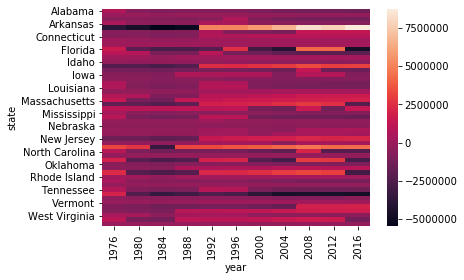

In [9]:
elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "candidatevotes"
                     )

ax = sns.heatmap(data=elections)

Clearly much needs to be done!  Certainly this is too small to read and I notice that all states are not even labeled on the vertical axis.  Upon closer inspection, I also noticed that the top and bottom horizontal "bars" of the graph were cut in half.  Therefore I made the following alterations noted below:

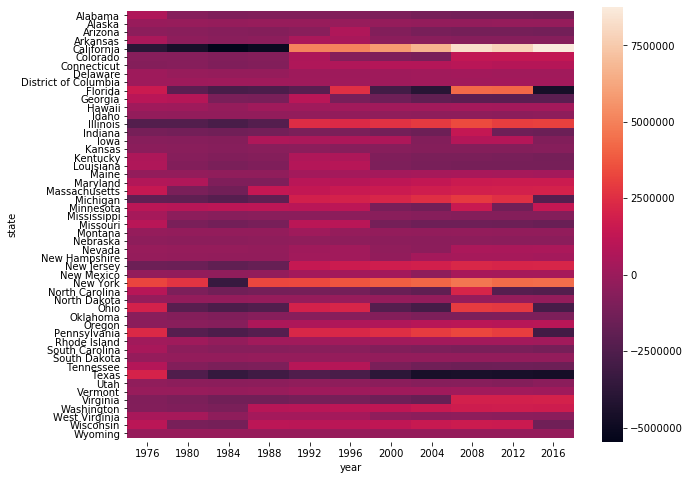

In [10]:
plt.figure(figsize=(10,8))                  #     <---- larger graph

elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "candidatevotes"
                     )

ax = sns.heatmap(data=elections,
                 xticklabels=True,          #     <---- forces all data to be labeled on the x axis
                 yticklabels=True,          #     <---- forces all data to be labeled on the y axis
                )

#this is to fix the fact that the top and bottom rows get cut off of the heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

This is better, but it is still hard to distinguish the colors between the states and tell when certain "year" bars start and end.  I decided to add line spacing (the default is white, which I liked) to create a clearer grid. Also, I want a title for the color bar so that people reading the graph understand what is being represented by the color scale.

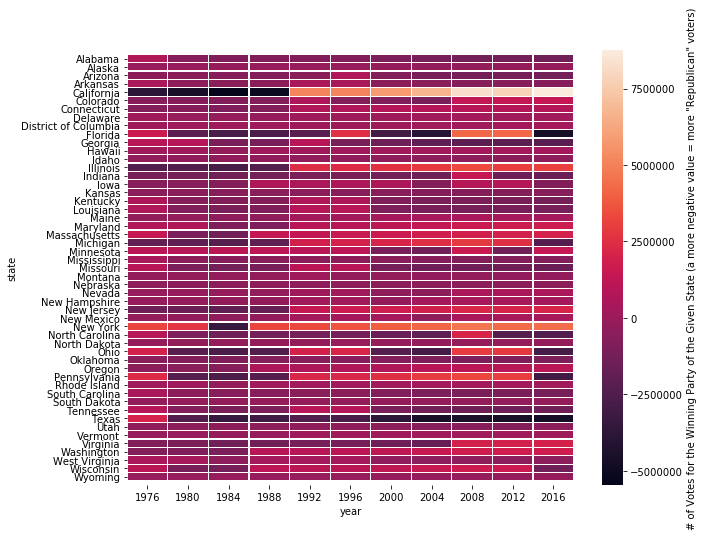

In [19]:
plt.figure(figsize=(10,8))

elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "candidatevotes"
                     )

ax = sns.heatmap(data=elections,
                 xticklabels=True, 
                 yticklabels=True,
                 linewidths=0.2,              #     <---- the value represents the thickness of the line creating the 'separator grid'
                 cbar = True,
                 cbar_kws={'label': '# of Votes for the Winning Party of the Given State (a more negative value = more "Republican" voters)'},     
                                              #     <---- the above line labels the cbar
                )

#this is to fix the fact that the top and bottom rows get cut off of the heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

The graph is still a bit small to read the text and the color scale such that most of the graph looks similar (hard to notice trends of any kind easily).  I decided to use a diverging color scale palatte that would go from Blue to Red (a state with more democrat votes to more republican votes, respectively).

I also decided to add a title and increase the size of the default axes labels.  Additionally, I explored putting the cbar horizontally beneath the graph but it was harder to read, so I kept it on the right side.

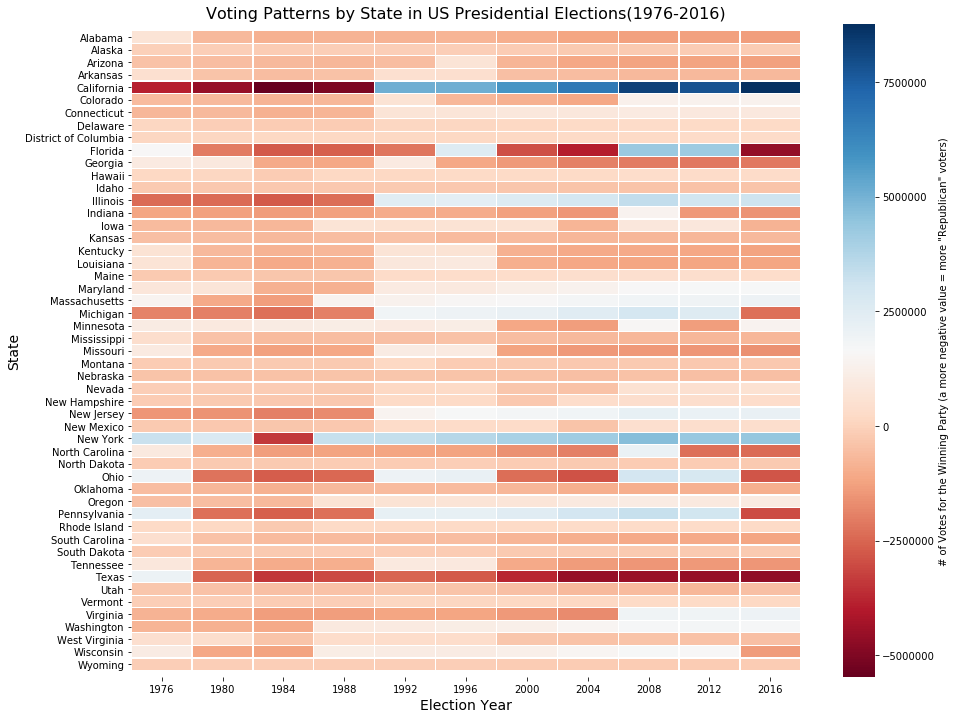

In [12]:
plt.figure(figsize=(15,12))

elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "candidatevotes"
                     )

ax = sns.heatmap(data=elections,
                 xticklabels=True, 
                 yticklabels=True,
                 linewidths=0.2,
                 cbar = True,
                 cbar_kws={'label': '# of Votes for the Winning Party (a more negative value = more "Republican" voters)'},
                #'orientation':'horizontal'},             <----   I thought this made the map less readable since you had to scroll to bottom to see scale
                 cmap="RdBu"                   #          <----   chose diverging color palette 
                )

#adding title and increasing size of default font of the axes labels
ax.set_title("Voting Patterns by State in US Presidential Elections(1976-2016)", fontsize=16)
plt.xlabel("Election Year", fontsize=14)
plt.ylabel("State", fontsize=14)


#this is to fix the fact that the top and bottom rows get cut off of the heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.show()        

This looks much closer to what I had in mind and what I wanted to explore.  Right now, though, the visual data is skewed so that the "middle" of the scale of the color bar is already a shade of red.  That would mean that a state that went to a Democrat would actually appear to have gone to a Republican.  Because the color scale is not accurately representing the data & visualization, I forced the "middle/center" of the color scale to be "zero".

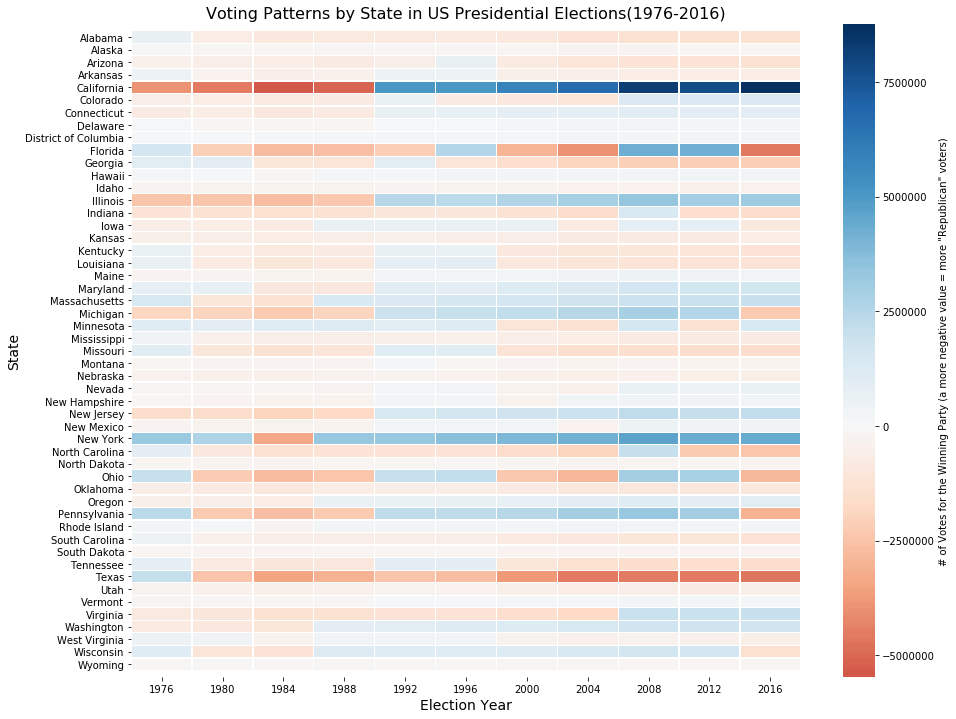

In [13]:
plt.figure(figsize=(15,12))

elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "candidatevotes"
                     )

ax = sns.heatmap(data=elections,
                 xticklabels=True, 
                 yticklabels=True,
                 linewidths=0.2,
                 cbar = True,
                 center=0,    #                   <----   forcing center of scale to zero.
                 cbar_kws={'label': '# of Votes for the Winning Party (a more negative value = more "Republican" voters)'},
                 cmap="RdBu"
                )

ax.set_title("Voting Patterns by State in US Presidential Elections(1976-2016)", fontsize=16)
plt.xlabel("Election Year", fontsize=14)
plt.ylabel("State", fontsize=14)


#this is to fix the fact that the top and bottom rows get cut off of the heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.show() 

This looks much better and, in a visual way, more accurately represents the data.  Now, all states that are a shade of __<font color=blue>blue</font>__  are ones that went to a Democratic candidate for president.  It makes sense to perform this shift especially because of the United States's use of the Electoral College which is largely "all or nothing" by state (meaning most often the candidate who gets the majority of the votes is essentially awarded all of the Electoral College votes for that state).

The coloring of the graph looks a bit anemic, however.  This is because California has such a high population relative to other states that to create a color scale based on votes alone will make the states with a higher number of voters darker for that reason alone.  While this is still interesting to look at - and in fact this visual shows which states have higher populations _(which would also be a loose representation of states with more Electoral College votes as well)_ this is not exactly what I had in mind.  I was hoping to see which states are "more Democrat" or "more Republican" based on that state's voters, but not "watered down" by the fact that the state might have fewer voters overall (especially compared to "outliers" in population size like California, Texas, etc.).

The color of the above graph could also be misleading because you might be inclined to think that California was "very Republican/conservative" from 1976 - 1988 (which could be an interpretation of the data), but it could also just be that California had a comparatively bigger population than the other states.

***
_This is why normalizing the data of a heatmap in some way is often a good idea_

I decided I did want to 'normalize' the data in a sense by dividing the number of votes for the winning party candidate in a state by the total number of votes in that state (which would include those from the main parties, but also the green part, write-ins, etc.).  This would make it so that the colorscale would be based on the __fraction__ of the votes the candidate received which would mean the all values would be between 0 and 1 (or because of the scale I am using, __<font color=red>-1</font>__ and __<font color=blue>1</font>__).

In [14]:
# Getting the fraction of a states total votes that went to the party that "won" the state in a given election (assuming here that the state receives all votes, 
# which is not always the case).

df['fraction_of_total_votes_cast'] = df['candidatevotes']/df['totalvotes']

df.head()

year       state state_po      candidate       party  candidatevotes  \
year                                                                           
1976 0  1976     Alabama       AL  Carter, Jimmy    democrat          659170   
     2  1976      Alaska       AK   Ford, Gerald  republican          -71555   
     4  1976     Arizona       AZ   Ford, Gerald  republican         -418642   
     6  1976    Arkansas       AR  Carter, Jimmy    democrat          498604   
     8  1976  California       CA   Ford, Gerald  republican        -3882244   

        totalvotes  fraction_of_total_votes_cast  
year                                              
1976 0     1182850                      0.557273  
     2      123574                     -0.579046  
     4      742719                     -0.563661  
     6      767535                      0.649617  
     8     7803770                     -0.497483

I also decided that the label for the colorbar was a bit too wordy, so I shortened it!  I considered adding the numerical annotation to each value in the grid but it really seemed to clutter the graph and also not add much value, so I left it out.

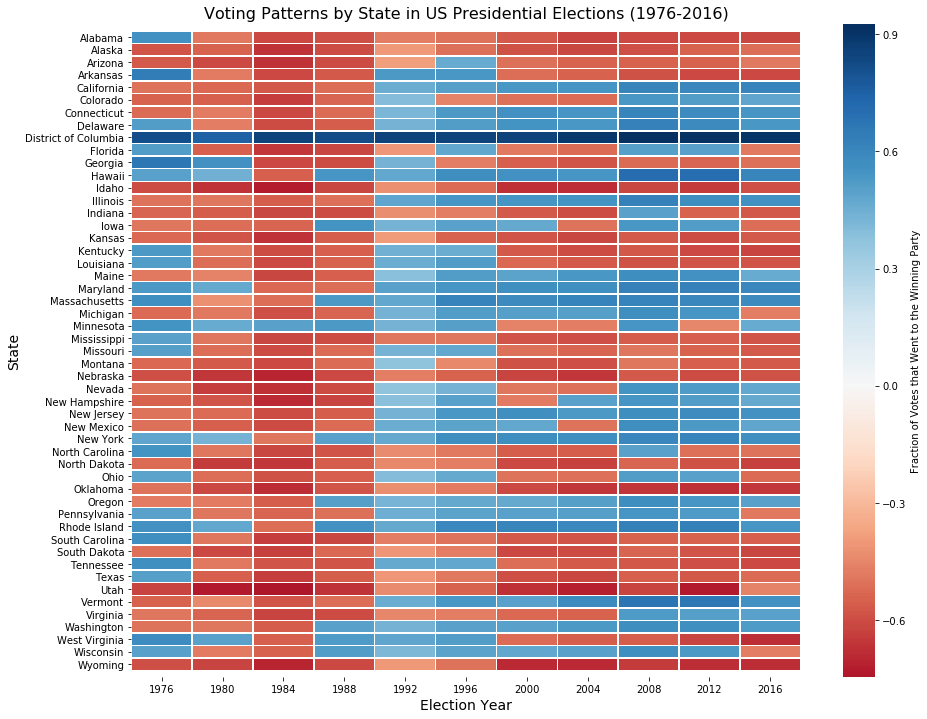

In [15]:
plt.figure(figsize=(15,12))

elections = df.pivot(index = "state", 
                     columns = "year", 
                     values = "fraction_of_total_votes_cast"
                     )

ax = sns.heatmap(data=elections,
                 xticklabels=True, 
                 yticklabels=True,
                 linewidths=0.5, 
                 center=0,
                 cbar = True,
                 cbar_kws={'label': "Fraction of Votes that Went to the Winning Party"},   #   <---More concise title for easier readability 
              #  annotate=True,              <--- this really added clutter to the graph I thought and didn't add much value in this situation
                 cmap="RdBu"
                )

ax.set_title("Voting Patterns by State in US Presidential Elections (1976-2016)", fontsize=16 )
plt.xlabel("Election Year", fontsize=14)
plt.ylabel("State", fontsize=14)


#this is to fix the fact that the top and bottom rows get cut off of the heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


plt.show()

That looks much better. Now, a darker color represents a higher fraction of the total votes that went to the respective candidate in the state.  Interesting things can be quickly gleaned from the table above including:
- in the 1984 election (of Ronald Regan) only two states/districts voted for the democratic candidate.
- Washington DC for years has had well over 60% of is total votes cast go to the democratic candidate.
- darker colors would represent states/districts that would be harder to "flip" and maybe states that have flip-floped colors are more likely "battleground" states
- States like Wyoming and Idaho were faintly colored on the prior graph, but the fact that they are a deep red on this graph means that not only do a high percentage of people who cast votes vote Republican, but the voting population in the state is also small, so this graph is actually somewhat interesting to pair with the prior graph.

__Note:__ Once again, making the Republican-state values negative decimals in the scale was to simply get the continuous colorscale spectrum.  The downside of this method is that all of the colors would now be darker as opposed to lighter before because someone could't win a state with, say, 10% of the total votes, so all colors are comparatively darker than the prior graph, but I think this better represents that trends I was looking for.

***

__For fun__, and because I became a bit curious about voting distributions after seeing the above heatmaps, so I decided to quickly make some Violin Plots also with Seaborn to see how the data is distributed:

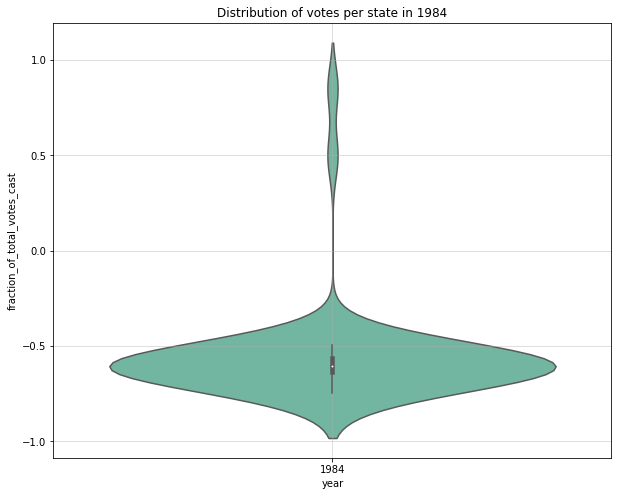

In [16]:
plt.figure(figsize=(10,8))

sns.violinplot(x = 'year',
               y = 'fraction_of_total_votes_cast',
               data=df[df.year == 1984],     #       <----- I chose one year, 1984 (which was heavily Republican) to see how it looked
               width=0.8, 
               palette="Set2",
               inner = 'box',
               showmedians=True
               )

plt.title('Distribution of votes per state in 1984')
plt.grid(True, alpha=0.5)
plt.show()

At first I thought about using the widget to get a more detailed view of the distribution of voting fractions by year, but then I decided to do it more comparatively across all of the elections from 1976 to 2016 all at once.

In [17]:
widgets.Dropdown(
    options=df['year'].unique(),
    value=df['year'].unique()[0],
    description='Year:',
)

Dropdown(description='Year:', options=(1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016), valu…

In [18]:
"""
NOTE: I got this coding format from @ChrisBrooks in his Twitch session involving Widgets.  Thanks!
"""

#creating a drop down of what can be graphed in the df (dropping any Columns that can't be graphed because the data is of the wrong type)
potential_columns=[]
for col in df.columns:
    if df[col].dtype != 'object':
        potential_columns.append(col)

#creates the interactive dropdown widget
@interact(col_name=
widgets.Dropdown(
    options=potential_columns[1:],       # this was so you don't get a graph of year vs. year
    value=potential_columns[3],          # This is the default value of the dropdown
    description='Vertical Axis:',
        ))

#make a plot!
def plot_data(col_name):
    plt.figure(figsize=(20,7))#          <----- chose these graphing dimensions so the whole graph and dropdown could all be seen easily

    sns.violinplot(x = 'year',
                   y = df[col_name],#    <----- the columns that can be selected
                   data=df,
                   width=0.9, #          <----- high width values were chosen so data 'density' differences are more obvious, but not too high to avoid overlap
                   palette="Set2",
                   inner = 'box',
                   showmedians=True,
                   cut=0  #              <----- I did this because the graph was showing negative values of votes in some instances
              )
    plt.title("Distribution of Votes per State in Presidential Elections (1976-2016)" , fontsize=18)
    plt.xlabel("Election Year", fontsize=14)
    plt.ylabel(col_name, fontsize=14)#   <----- will display the name of whatever column is being graphed
    plt.grid(True, alpha=0.5)
    plt.show()

interactive(children=(Dropdown(description='Vertical Axis:', index=2, options=('candidatevotes', 'totalvotes',…

I chose to use the "cut" parameter of the violin plot because otherwise the visualization whas extending into areas where there was no data, so - though maybe less visually appealing - I feel this better represents the data itself. 

Some interesting possible interpretations/questions to consider:
- especially with the "cut" parameter, you can bettter see both the extremes of the data and see the comparative means for each year with the "white dot" in the central bars that are shown
- Could the fact that the data has become so "stretched" and split in more recent years (particularly when graphing the "fraction_of_total_votes_cast" and "candidatevotes" and be a demonstration window into the fact that politics in the US has become not just very divided, but also somewhat divisive?


# Conclusions and Next Steps

__<font color=blue>Adherence to the "Ten Rules"</font>__  <br>
_Below, I have __BOLDED__ the Rules from [Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007007) to which I feel I most adhered_

__- Rule 1: Tell a story for an audience__<br>
    - I tried to create a bit of a narrative about what I was trying to show and how I was trying to go about it, and what tools I used
__- Rule 2: Document the process, not just the results__<br>
    - I tried to do a good job of walking through my steps and logic so that they are easily followed 
__- Rule 3: Use cell divisions to make steps clear__<br>
    - Each cell is meant to show something discrete and cells are broken up by text with explanations and some analysis.
__- Rule 4: Modularize code__<br>
    - I tried to create some definitions and use some generalized code so that some things could be readily reused and used fewer lines of code (except for the part where I was trying to demonstrate the logic of the evolution of my plot...there I tried to show more code as opposed to modularize because of this assignment
__- Rule 5: Record dependencies__<br>
    - I did try to record my dependencies, including how I installed the seaborn library, etc.
-Rule 6: Use version control <br>
<br>

__- Rule 7: Build a pipeline__<br>
    - With the help of Dr. Brooks, I have tried to build a bit of a pipeline in that, for example, the code I used for the dropdown widget is largely generalized (in fact I already dropped in into assigment3 to quickly explore the data
-Rule 8: Share and explain your data <br>
<br>

__- Rule 9: Design your notebooks to be read, run, and explored__<br>
    - With MADS_Weekly_Workouts and this assignment I am trying to getting in the habit of posting my work to github and using https://nbviewer.jupyter.org/ to make my work more readable to others.  I still need to work on developing my use of Binder, however, so it can be more interactive. HERE:https://github.com/pnatland22/Projects/tree/master is the link to my github where I posted the file.
    
-Rule 10: Advocate for open research<br>


***


__<font color=blue>Next Steps</font>__  <br>

If I were to continue to explore this data - which I might because I really enjoyed this assignement - I would consider each of the following:
- Using a plot.ly Chloropleth map of the US as a heatmap and create a slider/video of these changes over time it would be more dynamic with "hover over" information and has a pleasing geographic visual!
- using something like a bubblemap with plot.ly to track what some refer to as the 'voter-power index' which tracks the states whose individual votes carry the most weight (by comparing the number of electoral college votes per state to the voting population that state).  For example, because Wyoming has such a low population and 3 electoral college votes, individual voters in that state have more 'voting power' compared to someone in, say, California which has more electoral college votes but a disproporionately larger voting population).


- __<font color=blue>Where to explore:</font>__  <br>
    - __State Electoral Vote History (Since the 1900 Presidential Election)__
         - https://www.270towin.com/state-electoral-vote-history/
         - this site shows the electoral college votes available per state/district since 1900!  It was hard for me to find this source.
 
    - __United States Elections Project__
         - http://www.electproject.org/home/voter-turnout/voter-turnout-data